<a href="https://colab.research.google.com/github/Shirish2004/EOG_Movement_Classification/blob/main/Eye_Movement_Classification_Self_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREATING A NEURAL NETWORK MODEL FOR THE CLASSIFICATION OF FORWARD SACCCADE, BACKWARD SACCADE AND EYE BLINK 
RESPECTIVELY DENOTED AS 1,2,3 LABELS.

We will be using sequential api of the keras library .
Keras library is a python library used for dee[ learning that wraps the efficient numerical libraries like Tensorflow and Theano.
Keras lets us design sequential and complex neural network easily and efficiently .

In [ ]:
#importing libraries and mounting google drive 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


  FIRST WE DEAL WITH THE SELF EYE STATE DATA.
  for this we will use a fully connected neural network model.

In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/Datasets_used_for_model/self_eye_state.csv")
from sklearn.utils import shuffle
data1=data1.dropna()
data1=shuffle(data1)
print(data1.head(),data1.tail(),data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30020 entries, 5000 to 767
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pd_t    30020 non-null  float64
 1   target  30020 non-null  float64
dtypes: float64(2)
memory usage: 703.6 KB
         pd_t  target
5000  -209.93     0.0
8224    18.10     0.0
22368  -10.80     1.0
915     44.74     0.0
4196    31.42     0.0          pd_t  target
6798   273.38     0.0
19202   -7.10     1.0
28323   -0.25     1.0
5601   -19.10     0.0
767    -35.89     0.0 None


In [ ]:
#Selecting the target and independent variable 
X=np.array(data1.pd_t).reshape(-1,1)
Y=np.array(data1.target).reshape(-1,1)
#printing the shapes of the variables
print(X.shape,Y.shape)
#standardising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

(30020, 1) (30020, 1)


In [ ]:
#importing more libraries 
!pip install scikeras
from scikeras.wrappers import KerasClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#before proceeding we se the random_seed to number here we have use 42 so as to reproduce the results each  time it is run
tf.random.set_seed(42)
np.random.seed(42)

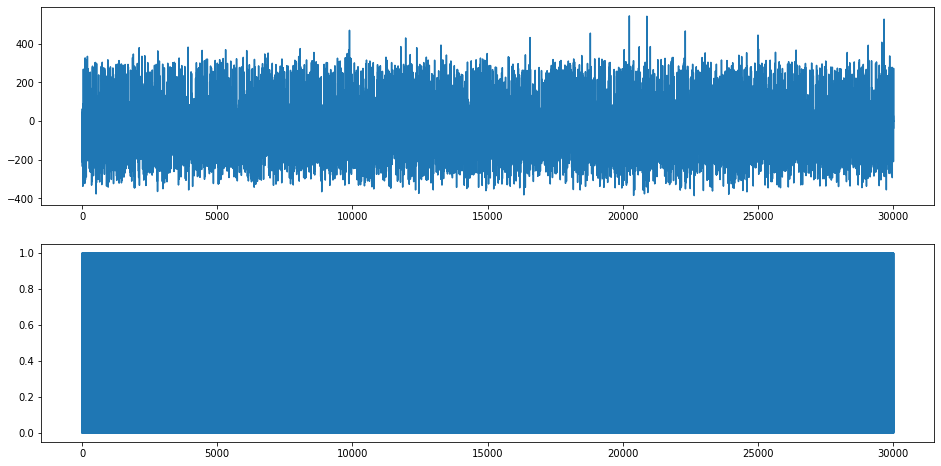

In [ ]:
#Visualizing the data 
plt.figure(figsize=(16,8))
for i in range(data1.values.shape[1]):
    plt.subplot(data1.values.shape[1],1,i+1)
    plt.plot(data1.values[:,i])
plt.show()

In [ ]:
#train_test_split 
from sklearn.model_selection import train_test_split as tts
x_train_val,x_test,y_train_val,y_test=tts(X,Y,test_size=0.3,random_state=42)
x_train,x_val,y_train,y_val=tts(x_train_val,y_train_val,test_size=0.2,random_state=42)
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape,x_test.shape,y_test.shape)

(16811, 1) (4203, 1) (16811, 1) (4203, 1) (9006, 1) (9006, 1)


BASELINE MODEL 

In [ ]:
model1=keras.Sequential([
                         keras.layers.Dense(60,activation='relu',input_shape=(X.shape)),
                         keras.layers.Dense(60,activation='relu'),
                         keras.layers.Dense(60,activation='relu'),
                         keras.layers.Dense(1,activation='sigmoid')
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30020, 60)         120       
                                                                 
 dense_5 (Dense)             (None, 30020, 60)         3660      
                                                                 
 dense_6 (Dense)             (None, 30020, 60)         3660      
                                                                 
 dense_7 (Dense)             (None, 30020, 1)          61        
                                                                 
Total params: 7,501
Trainable params: 7,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss="binary_crossentropy",optimizer="adam",
              metrics=['accuracy'])

In [ ]:
#creating early callbacks 
early_stopping_cb=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)#stops when there is no further decrease in val loss
checkpoint_cb=keras.callbacks.ModelCheckpoint("early_stop_Model.h5",save_best_onlny=True)#saves the model where validation loss is the least

model_history=model1.fit(x_train,y_train,epochs=200,validation_data=(x_val,y_val),callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/200
526/526 [==============================] - 2s 2ms/step - loss: 0.3646 - accuracy: 0.8593 - val_loss: 0.2852 - val_accuracy: 0.8984
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.3118 - accuracy: 0.8858 - val_loss: 0.2843 - val_accuracy: 0.8972
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.3123 - accuracy: 0.8874 - val_loss: 0.2845 - val_accuracy: 0.8977
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.3112 - accuracy: 0.8862 - val_loss: 0.2886 - val_accuracy: 0.8965
Epoch 5/200
526/526 [==============================] - 1s 2ms/step - loss: 0.3105 - accuracy: 0.8861 - val_loss: 0.2874 - val_accuracy: 0.8958
Epoch 6/200
526/526 [==============================] - 1s 2ms/step - loss: 0.3107 - accuracy: 0.8864 - val_loss: 0.2826 - val_accuracy: 0.8975
Epoch 7/200
526/526 [==============================] - 1s 2ms/step - loss: 0.3109 - accuracy: 0.8859 - val_loss: 0.2839 - val_accuracy: 0.8977

In [ ]:
model_history.history

{'accuracy': [0.8592588305473328,
  0.8857890963554382,
  0.8873951435089111,
  0.8862054347991943,
  0.8860864639282227,
  0.8863838911056519,
  0.8859080076217651,
  0.8869787454605103,
  0.8869787454605103,
  0.8861459493637085,
  0.886324405670166],
 'loss': [0.36458274722099304,
  0.3118131756782532,
  0.3122994899749756,
  0.3112435042858124,
  0.3104570806026459,
  0.31073445081710815,
  0.31093043088912964,
  0.3095482289791107,
  0.30937162041664124,
  0.31011709570884705,
  0.30987346172332764],
 'val_accuracy': [0.898405909538269,
  0.897216260433197,
  0.8976921439170837,
  0.8965024948120117,
  0.8957887291908264,
  0.8974542021751404,
  0.8976921439170837,
  0.8976921439170837,
  0.8955507874488831,
  0.8969783782958984,
  0.8976921439170837],
 'val_loss': [0.2852283716201782,
  0.2843460440635681,
  0.28453418612480164,
  0.2886299788951874,
  0.28739431500434875,
  0.2825835645198822,
  0.2839137315750122,
  0.28908979892730713,
  0.2879546880722046,
  0.284627288579940

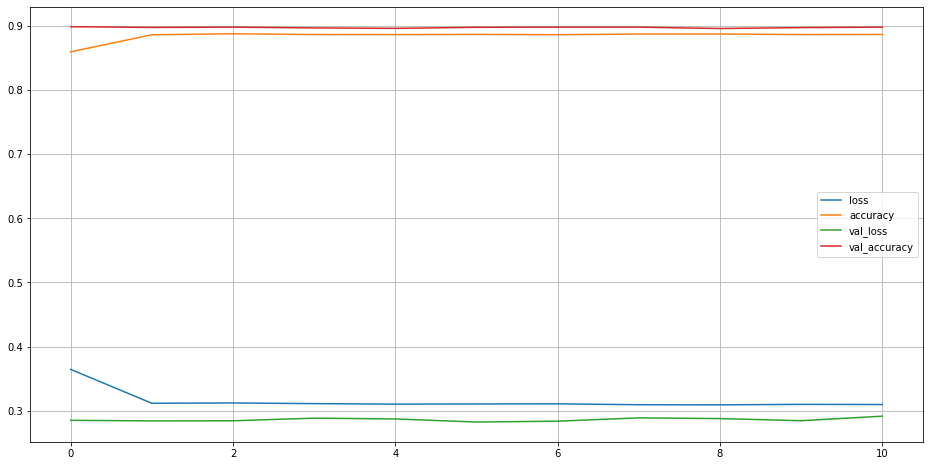

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(16,8))
plt.gca()
plt.grid(True)
plt.show()

It is evident from the above graph that the model has converged.
Also since there is no significant difference among the loss and val_loss we can say that the model is correct and is neigther underfitting nor overfitting

In [ ]:
#evaluating the model 
evaluation=model1.evaluate(x_test,y_test)
print("The loss is {loss:0.2f}  \n The accuracy is {accuracy:.02f}".format(loss=evaluation[0],accuracy=evaluation[1]*100))

282/282 [==============================] - 0s 890us/step - loss: 0.3128 - accuracy: 0.8824
The loss is 0.31  
 The accuracy is 88.24


Predicting using the model

In [ ]:
#prediction 
def prediction(model,inp):
  y_pred = np.argmax(model.predict(inp), axis=-1)
  return y_pred

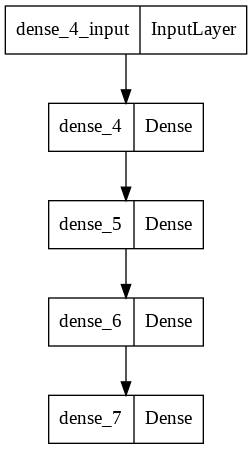

In [ ]:
#Plotting the model
keras.utils.plot_model(model1, "early_stop_Model.png")

**CROSS VALIDATION AND SACLING** 

We us cross validation so as to check if the model can be trained more efficiently and if it can perform better or not.
Under cross validation the model undergoes training among different training sets divided into batches also called folds. If ther are k folds then model undergoes training of k-1 folds and validation over the left over training set

In [ ]:
def create_model():
  model1_a=keras.Sequential([
                         keras.layers.Dense(60,activation='relu',input_shape=[1]),
                         keras.layers.Dense(60,activation='relu'),
                         keras.layers.Dense(60,activation='relu'),
                         keras.layers.Dense(1,activation='sigmoid')])
  model1_a.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=1e-4),
              metrics=['accuracy'])
  return model1_a
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=model1, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline,x_train_val.reshape(-1,1), y_train_val, cv=kfold)


INFO:tensorflow:Assets written to: ram:///tmp/tmpkkwsg2bz/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmps8ywdfbv/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpxp7prof7/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmp7wyox38_/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpu62kqsdo/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpsiv4t7s2/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpzydbmevm/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpdrq2tg3_/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpo_xmddh3/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpe0gly6s9/assets


In [ ]:
type(results)

numpy.ndarray

Text(0.5, 1.0, 'Cross validation Score')

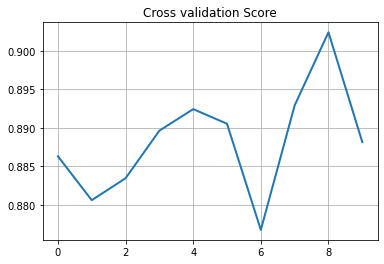

In [ ]:
results
plt.plot(results,linewidth="2")
plt.grid(True)
plt.title("Cross validation Score")

In [ ]:
print("Average accuracy is: ",results.mean()*100)

Average accuracy is:  88.83131860094713
